# The *K* Nearest  Neighbors Classifier


## [*K* Nearest  Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

For fixed $K$, *the KNN classifier predicts the class of $\bf x$ as the majority class among its $K$ nearest neighbors*.

Unlike the Logistic Regression classifier, KNN is your first example of a multi-class classifier. It can just as easily classify as many classes as there are datapoints, if it is so desired (not very accurate). In general, it can be used (with low accuracy) on up to $\dfrac{N}{K}$ classes, where $N$ is the number of distinct training samples (rows) and $K$ is a number provided to it by the user.

<img src="imgs/knn_cartoon.png"/ width=450>

### K as a hyperparameter

$K$ is a **hyperparameter** for the classifier. Hyperparameters differ from parameters in that the hyperparameters are the parameters for the underlying prior distribution of a model. The machine learning step learns **parameters** from the data, but the human has to make efforts to determine the **hyperparameters** for the model.

This idea can also be extended to distribution theory. For example:

Suppose we are using a beta distribution to model the distribution of the parameter p of a Bernoulli distribution, then:

$p$ is the parameter of the underlying system (Bernoulli distribution), and $\alpha$ and $\beta$ are parameters of the prior distribution (beta distribution), hence they are hyperparameters.



## Distance Metrics

As explained above, KNN algorithm assigns a class to the test point based on the majority class of $K$ nearest neighbours. In general, euclidean distance is used to find nearest neighbours, but other distance metrics ($L^{p}$-metrics) can also be used.

As the dimensionality of the feature space increases, the euclidean distance often becomes problematic due to the *curse of dimensionality*.

In such cases, alternative vector-based similarity measures (dot product, cosine similarity, etc) are used to find the nearest neighbours. This transforms the original metric space into one more amicable to point-to-point measurements. 

## Algorithm

The KNN algorithm is very simple to implement, as it does not need to be trained. The training phase merely stores the training data. For each test point, we calculate the distance of that data point to every existing data point and find the $K$ closest ones. What we return is the the most common amongst the top k classification nearest to the test point. Here's the pseudocode for _K_ Nearest Neighbors:

```
kNN:
    for every point x in the dataset:
        calculate the distance between the point and x
        sort the distances in increasing order
        take the k items with the smallest distances to x
        return the majority class among these k items
```

Note that for large data sets, the algorithm can take very long to predict because it has to calculate the distance between the test point and evey other point in the data!

### Question:

What is the complexity order $O(N)$ of this operation?

The predicted class can be different for different values of $K$. For binary classification tasks, odd values of $K = 1,3,5,\cdots$ are used to avoid ties, i.e., two class labels achieving the same score. For more than two classes, ties can be broken at random. The particular case of $K = 1$ is called the *nearest-neighbour* rule, because a test point is simply assigned to the same class as the nearest point from the training set.


#### Ball Trees and K-D-Trees

The computational difficulty of the *brute force* algorithm described above can be overcome by the use of efficient data structures, namely the *Ball Tree* and *K D Tree*, which eliminate the necessity of the algorithm trying to label based on every data point in the training dataset, by eliminating those neighbors from the loop that are too far away to matter. 



## Application

Use the `plot_decision_boundary()` function and the starter code provided to compare Logistic Regression and KNN on the `grad.csv` dataset.

1) Load the .csv file from `./data/grad.csv` into a suitable format. You can use pandas if you like or np.loadtxt() or roll your own. Only use the ['gre', 'gpa'] features.

2) You will need to use StandardScaler() from the sklearn.preprocessing library:

`scaler = StandardScaler()
 scaler.fit(X)
 X = scaler.transform(X)`

3) Try out using LogisticRegression and LogisticRegressionCV, play with different values of C (at least 5 different values from 0.05-5.0) and plot those boundaries.

4) Now try out KNeighborsClassifier and play with n_neighbors. Plot these boundaries. What do you observe?

5) Based on the boundaries you find, which is the better classifier? Does this conclusion seem "right" to you?

6) Double check these conclusions by running a train_test_split() and getting a cross_val_score(). Both are found in the [model_selection library](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

In [21]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_decision_boundary(clf,X,y,cmap_bold, cmap_light,h = .02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return

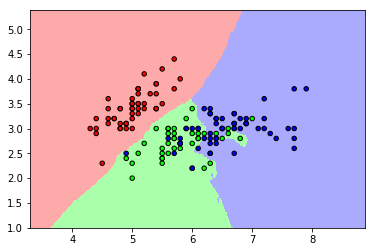

In [37]:
# Let's practice with KNN and compare it to LR for a classification task.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. 
X = iris.data[:, :2]
y = iris.target

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

plot_decision_boundary(clf,X,y,cmap_bold,cmap_light)

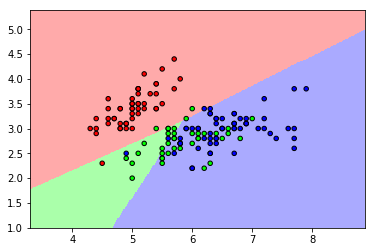

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=True, C=0.5)
lr.fit(X,y)
plot_grid(lr,X,y,cmap_bold,cmap_light)

In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('./data/grad.csv')
y = data['admit'].as_matrix()
X = data[['gre','gpa']].as_matrix()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

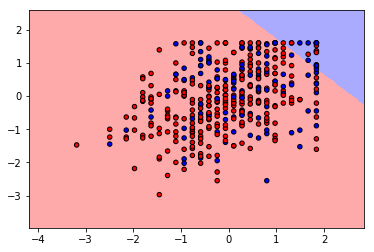

In [58]:
lr = LogisticRegression(C=3.5)
lr.fit(X,y)
plot_grid(lr,X,y,cmap_bold,cmap_light)

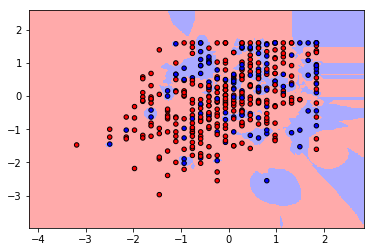

In [60]:

# we only take the first two features. 
#X = iris.data[:, :2]
#y = iris.target

clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
clf.fit(X, y)

plot_decision_boundary(clf,X,y,cmap_bold,cmap_light)

## [Nearest Centroid](https://en.wikipedia.org/wiki/Nearest_centroid_classifier)

There is also a [nearest centroid classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html#sklearn.neighbors.NearestCentroid), that is conceptually exactly the same as the Nearest Neighbors classifier, but instead calculates centroids (centers of mass) common to the training data. This is a more modern and generally useful classifier algorithm representative of the current state-of-the-art.
